In [1]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.lda import LDA
import datetime


/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [2]:
DATA_PATH_SAT = "/home/xiaohang/Desktop/59970/project/data science new topic/SAT_Results.csv"
DATA_PATH_NYSD = "/home/xiaohang/Desktop/59970/project/data science new topic/nysd.csv"
DATA_PATH_NYS_MATH = "/home/xiaohang/Desktop/59970/project/data science new topic/NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv"
DATA_PATH_ATT = "/home/xiaohang/Desktop/59970/project/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11.csv"
DATA_PATH_DEMO = "/home/xiaohang/Desktop/59970/project/data science new topic/School_Demographics_and_Accountability_Snapshot_2006-2012.csv"
DATA_PATH_OUTC = "/home/xiaohang/Desktop/59970/project/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
DATA_PATH_AP = "/home/xiaohang/Desktop/59970/project/data science new topic/AP__College_Board__2010_School_Level_Results.csv"
DATA_PATH_SIZE = "/home/xiaohang/Desktop/59970/project/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
DATA_PATH_MAS1 = "/home/xiaohang/Desktop/59970/project/2011 data files online/masterfile11_d75_final.xlsx"
DATA_PATH_MAS2 = "/home/xiaohang/Desktop/59970/project/2011 data files online/masterfile11_gened_final.xlsx"
DATA_PATH_SUR = "/home/xiaohang/Desktop/59970/project/2011 data files online/Survey Data Dictionary.xls"
DATA_PATH_Sch = '/home/xiaohang/Desktop/59970/project/data science new topic/School_Progress_Report_2010-2011.csv'


# SAT grade

In [3]:
r_sat = pd.read_csv(DATA_PATH_SAT)
print(r_sat.dtypes)
r_sat.head()

DBN                                object
SCHOOL NAME                        object
Num of SAT Test Takers             object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [4]:
sat = r_sat.loc[:, {"DBN", 'SCHOOL NAME', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', 'SAT Writing Avg. Score'}]
sat.head()
sat.dtypes

SCHOOL NAME                        object
SAT Critical Reading Avg. Score    object
SAT Writing Avg. Score             object
SAT Math Avg. Score                object
DBN                                object
dtype: object

In [5]:
def convert_num(datframe, col_name):
    datframe[col_name] = datframe[col_name].convert_objects(convert_numeric=True)
    
convert_num(sat, 'SAT Math Avg. Score')
convert_num(sat, 'SAT Writing Avg. Score')
convert_num(sat, 'SAT Critical Reading Avg. Score')

sat['Total Avg.']= sat.sum(axis = 1)
sat.head(10)

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,SCHOOL NAME,SAT Critical Reading Avg. Score,SAT Writing Avg. Score,SAT Math Avg. Score,DBN,Total Avg.
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,355.0,363.0,404.0,01M292,1122.0
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,383.0,366.0,423.0,01M448,1172.0
2,EAST SIDE COMMUNITY SCHOOL,377.0,370.0,402.0,01M450,1149.0
3,FORSYTH SATELLITE ACADEMY,414.0,359.0,401.0,01M458,1174.0
4,MARTA VALLE HIGH SCHOOL,390.0,384.0,433.0,01M509,1207.0
5,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,332.0,316.0,557.0,01M515,1205.0
6,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",522.0,525.0,574.0,01M539,1621.0
7,CASCADES HIGH SCHOOL,417.0,411.0,418.0,01M650,1246.0
8,BARD HIGH SCHOOL EARLY COLLEGE,624.0,628.0,604.0,01M696,1856.0
9,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,395.0,387.0,400.0,02M047,1182.0


# NYSD

In [6]:
r_nysd = pd.read_csv(DATA_PATH_NYSD)
print(r_nysd.dtypes)
r_nysd.head()

the_geom       object
SchoolDist      int64
Shape_Leng    float64
Shape_Area    float64
dtype: object


,the_geom,SchoolDist,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82049919995312 40.80101146...,25,175816.081000,4.436314e+08
1,MULTIPOLYGON (((-74.02552971543656 40.65147855...,20,95513.486010,2.427230e+08
2,MULTIPOLYGON (((-73.95671863064405 40.78660079...,3,52071.976405,1.134879e+08
3,MULTIPOLYGON (((-73.92133752419399 40.80085210...,4,52056.107857,5.262001e+07
4,MULTIPOLYGON (((-73.74344992332192 40.77824115...,26,125716.377003,4.249042e+08


# math grade

In [8]:
r_math = pd.read_csv(DATA_PATH_NYS_MATH)
print(r_math.dtypes)
r_math.head(10)

DBN                 object
Grade               object
Year                 int64
Category            object
Number Tested        int64
Mean Scale Score    object
Level 1 #           object
Level 1 %           object
Level 2 #           object
Level 2 %           object
Level 3 #           object
Level 3 %           object
Level 4 #           object
Level 4 %           object
Level 3+4 #         object
Level 3+4 %         object
dtype: object


,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%
5,01M015,3,2011,All Students,28,671,10,35.7%,13,46.4%,5,17.9%,0,0%,5,17.9%
6,01M015,4,2006,All Students,49,629,20,40.8%,18,36.7%,10,20.4%,1,2%,11,22.4%
7,01M015,4,2007,All Students,40,659,4,10%,13,32.5%,18,45%,5,12.5%,23,57.5%
8,01M015,4,2008,All Students,41,655,5,12.2%,15,36.6%,18,43.9%,3,7.3%,21,51.2%
9,01M015,4,2009,All Students,39,655,4,10.3%,15,38.5%,18,46.2%,2,5.1%,20,51.3%


In [9]:
math_g = r_math.loc[:, {'DBN','Year','Mean Scale Score','Grade', 'Level 3+4 %'}]
math_g['Grade'] = math_g['Grade'].convert_objects(convert_numeric=True)
math_g = math_g.loc[(math_g['Grade']) >= 8]
math_g = math_g.loc[math_g['Year'] == 2011]
math_g.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Level 3+4 %,Grade,Year,Mean Scale Score,DBN
111,22.9%,8.0,2011,646,01M034
280,27.9%,8.0,2011,665,01M140
346,100%,8.0,2011,727,01M184
388,26.5%,8.0,2011,658,01M188
411,18.4%,8.0,2011,650,01M292


In [10]:
len(math_g)

499

# attendance

In [11]:
r_att = pd.read_csv(DATA_PATH_ATT)
print(r_att.dtypes)
r_att.tail()

District                  object
YTD % Attendance (Avg)    object
YTD Enrollment(Avg)        int64
dtype: object


,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
30,DISTRICT 31,90.98%,59373
31,DISTRICT 32,89.28%,15297
32,SPECIAL ED DISTRICT 75,83.21%,21435
33,ALTERNATIVE HIGH SCHOOLS,63.81%,7288
34,Citywide,89.99%,1002463


# percentage of diff group

In [12]:
r_demo = pd.read_csv(DATA_PATH_DEMO)
print(r_demo.dtypes)
r_demo.head()

DBN                   object
Name                  object
schoolyear             int64
fl_percent            object
frl_percent          float64
total_enrollment       int64
prek                  object
k                     object
grade1                object
grade2                object
grade3                object
grade4                object
grade5                object
grade6                object
grade7                object
grade8                object
grade9                object
grade10               object
grade11               object
grade12               object
ell_num              float64
ell_percent          float64
sped_num             float64
sped_percent         float64
ctt_num               object
selfcontained_num     object
asian_num              int64
asian_per            float64
black_num              int64
black_per            float64
hispanic_num           int64
hispanic_per         float64
white_num              int64
white_per            float64
male_num      

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [13]:
sub_demo = r_demo.loc[:, {'DBN', 'schoolyear','total_enrollment','asian_per','black_per','white_per','male_per','female_per'}]
sub_demo = sub_demo.loc[sub_demo['schoolyear'] == 20102011]
print(len(sub_demo))
sub_demo.head()

1498


,white_per,male_per,female_per,schoolyear,asian_per,DBN,total_enrollment,black_per
5,2.0,55.7,44.3,20102011,6.4,01M015,203,36.9
12,9.5,47.3,52.7,20102011,14.6,01M019,328,27.1
19,2.7,53.3,46.7,20102011,28.2,01M020,625,8.2
26,2.5,50.6,49.4,20102011,6.9,01M034,393,20.6
34,10.5,57.5,42.5,20102011,7.2,01M063,181,18.8


# outcome of school

In [49]:
len(r_outc)

25096

In [14]:
r_outc = pd.read_csv(DATA_PATH_OUTC)
print(r_outc.dtypes)
r_outc.head()

Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n              object
Regents w/o Advanced - % of cohort    object
Regents w/o Advanced - % of grads     object
Local - n                             object
Local - % of cohort                   object
Local - % of grads                    object
Still Enrolled - n                    object
Still Enrolled - % of cohort          object
Dropped Out - n                       object
Dropped Ou

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [15]:
r_outc.dropna()
r_outc.columns.values

array(['Demographic', 'DBN', 'School Name', 'Cohort', 'Total Cohort',
       'Total Grads - n', 'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n',
       'Local - % of cohort', 'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort'], dtype=object)

In [16]:
sub_outc = r_outc[r_outc['Cohort'] == '2006']
sub_outc = sub_outc.dropna()
print(sub_outc.dtypes)
len(sub_outc)

Demographic                           object
DBN                                   object
School Name                           object
Cohort                                object
Total Cohort                           int64
Total Grads - n                       object
Total Grads - % of cohort             object
Total Regents - n                     object
Total Regents - % of cohort           object
Total Regents - % of grads            object
Advanced Regents - n                  object
Advanced Regents - % of cohort        object
Advanced Regents - % of grads         object
Regents w/o Advanced - n              object
Regents w/o Advanced - % of cohort    object
Regents w/o Advanced - % of grads     object
Local - n                             object
Local - % of cohort                   object
Local - % of grads                    object
Still Enrolled - n                    object
Still Enrolled - % of cohort          object
Dropped Out - n                       object
Dropped Ou

4125

# Try to use SAT and PEER INDEX to predict Graduated percentage

In [17]:
sub_sat = sat.loc[: , {'DBN', 'Total Avg.'}]
sub_sat.head()

,DBN,Total Avg.
0,01M292,1122.0
1,01M448,1172.0
2,01M450,1149.0
3,01M458,1174.0
4,01M509,1207.0


In [24]:
sub_sat_peer = pd.merge(sub_sat, peer_index, how = 'inner', on= 'DBN')
sub_sat_peer.head()

,DBN,Total Avg.,PEER INDEX*
0,01M292,1122.0,1.81
1,01M448,1172.0,2.03
2,01M450,1149.0,2.26
3,01M509,1207.0,1.78
4,01M539,1621.0,3.48


In [25]:
len(sub_sat_peer)

397

In [57]:
sub_grad = sub_outc.loc[:, {'DBN', 'Total Grads - % of cohort'}]
len(sub_grad)

2834

In [58]:
sub_grad.head()

,DBN,Total Grads - % of cohort
3,01M292,55.1
10,01M448,42.7
17,01M450,77.8
24,01M509,56.0
31,01M515,54.4


In [59]:
sub_q3 = pd.merge(sub_sat_peer, sub_grad, how ='inner')
sub_q3.head()

,DBN,Total Avg.,PEER INDEX*,Total Grads - % of cohort
0,01M292,1122.0,1.81,55.1
1,01M292,1122.0,1.81,54.8
2,01M292,1122.0,1.81,63.3
3,01M292,1122.0,1.81,66.7
4,01M292,1122.0,1.81,40.5


In [60]:
len(sub_q3)

2462

In [61]:
sub_q3 = sub_q3.ix[sub_q3["Total Grads - % of cohort"] != np.nan]
sub_q3 = sub_q3.ix[sub_q3["Total Grads - % of cohort"] != 0]

In [62]:
len(sub_q3)

2462

In [63]:
sub_q3.head(30)

,DBN,Total Avg.,PEER INDEX*,Total Grads - % of cohort
0,01M292,1122.0,1.81,55.1
1,01M292,1122.0,1.81,54.8
2,01M292,1122.0,1.81,63.3
3,01M292,1122.0,1.81,66.7
4,01M292,1122.0,1.81,40.5
5,01M292,1122.0,1.81,50.0
6,01M292,1122.0,1.81,59.1
7,01M448,1172.0,2.03,42.7
8,01M448,1172.0,2.03,43.0
9,01M448,1172.0,2.03,20.0


In [64]:
len(sub_q3)

2462

In [65]:
sub_q3 = sub_q3.drop_duplicates('DBN')

In [66]:
len(sub_q3)

321

In [67]:
sub_q3.columns.values

array(['DBN', 'Total Avg.', 'PEER INDEX*', 'Total Grads - % of cohort'], dtype=object)

In [70]:
len(sub_q3['Total Avg.'])

321

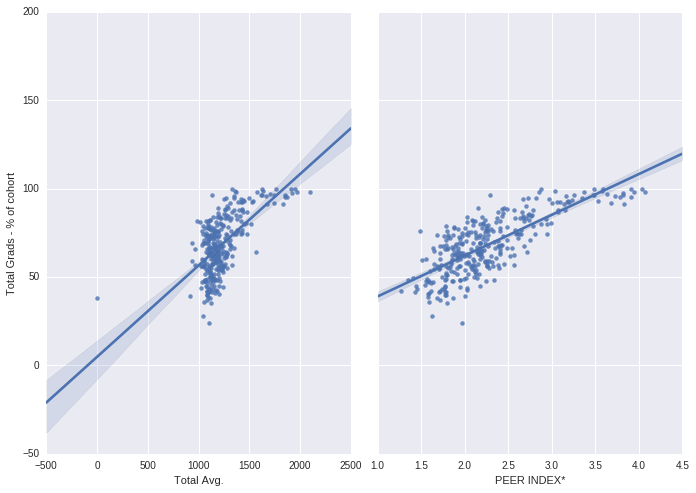

In [71]:
import seaborn as sns
sns.pairplot(sub_q3, x_vars=['Total Avg.', 'PEER INDEX*'], y_vars='Total Grads - % of cohort', size=7, aspect=0.7, kind='reg')

In [74]:
data_sample2 = sub_q3.loc[:, {'Total Avg.', 'PEER INDEX*'}]
data_target2 = sub_q3.loc[:, {'Total Grads - % of cohort'}]

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_sample2, data_target2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 2)
(240, 1)
(81, 2)
(81, 1)


In [76]:
linreg2 = LinearRegression()

linreg2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
linreg_scores2 = cross_val_score(linreg2, data_sample2, data_target2, cv=10, scoring='mean_squared_error')

In [81]:
mse_linreg_scores2 = -linreg_scores2
print(mse_linreg_scores2)
rmse_linreg_scores2 = np.sqrt(mse_linreg_scores2)
print(rmse_linreg_scores2)
print(rmse_linreg_scores2.mean())

[ 129.05103417  103.68480613   92.32212918   94.55970049  118.69557558
  117.80620636  138.5713561   174.44806498  101.04589285   68.62282226]
[ 11.36006312  10.18257365   9.60844052   9.72418122  10.89474991
  10.85385675  11.77163354  13.2078789   10.05215862   8.28388932]
10.5939425544


# Try to find the relationship between regent % and Graduated std %

In [26]:
sub_outc = sub_outc.loc[:, {'DBN', 'Total Grads - % of cohort',
       'Total Regents - % of cohort', 'Advanced Regents - % of cohort', 'Advanced Regents - % of grads'}]
sub_outc = sub_outc.ix[sub_outc['Total Grads - % of cohort']!= 's']
sub_outc = sub_outc.ix[sub_outc['Total Grads - % of cohort']!= 's']
sub_outc = sub_outc.ix[sub_outc['Total Grads - % of cohort']!= 's']
print(sub_outc.dtypes)
sub_outc.head()

Advanced Regents - % of cohort    object
Total Grads - % of cohort         object
DBN                               object
Advanced Regents - % of grads     object
Total Regents - % of cohort       object
dtype: object


,Advanced Regents - % of cohort,Total Grads - % of cohort,DBN,Advanced Regents - % of grads,Total Regents - % of cohort
3,0%,55.1%,01M292,0%,46.2%
10,6.5%,42.7%,01M448,15.1%,33.9%
17,0%,77.8%,01M450,0%,74.400000000000006%
24,20.2%,56%,01M509,36.200000000000003%,47.6%
31,35.799999999999997%,54.4%,01M515,65.7%,47.2%


In [27]:
len(sub_outc)

2835

In [28]:
sub_outc.head()

,Advanced Regents - % of cohort,Total Grads - % of cohort,DBN,Advanced Regents - % of grads,Total Regents - % of cohort
3,0%,55.1%,01M292,0%,46.2%
10,6.5%,42.7%,01M448,15.1%,33.9%
17,0%,77.8%,01M450,0%,74.400000000000006%
24,20.2%,56%,01M509,36.200000000000003%,47.6%
31,35.799999999999997%,54.4%,01M515,65.7%,47.2%


In [29]:
def remove_per(col, dataframes):
    dataframes[col] = dataframes[col].map(lambda x:x.rstrip('%'))

#data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
remove_per('Total Grads - % of cohort', sub_outc)
remove_per('Total Regents - % of cohort', sub_outc)
remove_per('Advanced Regents - % of cohort', sub_outc)
remove_per('Advanced Regents - % of grads', sub_outc)
convert_num(sub_outc, 'Total Grads - % of cohort')
convert_num(sub_outc, 'Total Regents - % of cohort')
convert_num(sub_outc,'Advanced Regents - % of cohort')
convert_num(sub_outc,'Advanced Regents - % of grads')
print(sub_outc.dtypes)
sub_outc.head()

Advanced Regents - % of cohort    float64
Total Grads - % of cohort         float64
DBN                                object
Advanced Regents - % of grads     float64
Total Regents - % of cohort       float64
dtype: object


/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Advanced Regents - % of cohort,Total Grads - % of cohort,DBN,Advanced Regents - % of grads,Total Regents - % of cohort
3,0.0,55.1,01M292,0.0,46.2
10,6.5,42.7,01M448,15.1,33.9
17,0.0,77.8,01M450,0.0,74.4
24,20.2,56.0,01M509,36.2,47.6
31,35.8,54.4,01M515,65.7,47.2


In [51]:
#remove_per('Advanced Regents - % of grads', sub_outc)
sub_outc = sub_outc.dropna()
print(sub_outc.dtypes)
sub_outc.columns.values

Advanced Regents - % of cohort    float64
Total Grads - % of cohort         float64
DBN                                object
Advanced Regents - % of grads     float64
Total Regents - % of cohort       float64
dtype: object


array(['Advanced Regents - % of cohort', 'Total Grads - % of cohort',
       'DBN', 'Advanced Regents - % of grads',
       'Total Regents - % of cohort'], dtype=object)

In [52]:
len(sub_outc)

2834

In [53]:
sub_outc.head()

,Advanced Regents - % of cohort,Total Grads - % of cohort,DBN,Advanced Regents - % of grads,Total Regents - % of cohort
3,0.0,55.1,01M292,0.0,46.2
10,6.5,42.7,01M448,15.1,33.9
17,0.0,77.8,01M450,0.0,74.4
24,20.2,56.0,01M509,36.2,47.6
31,35.8,54.4,01M515,65.7,47.2


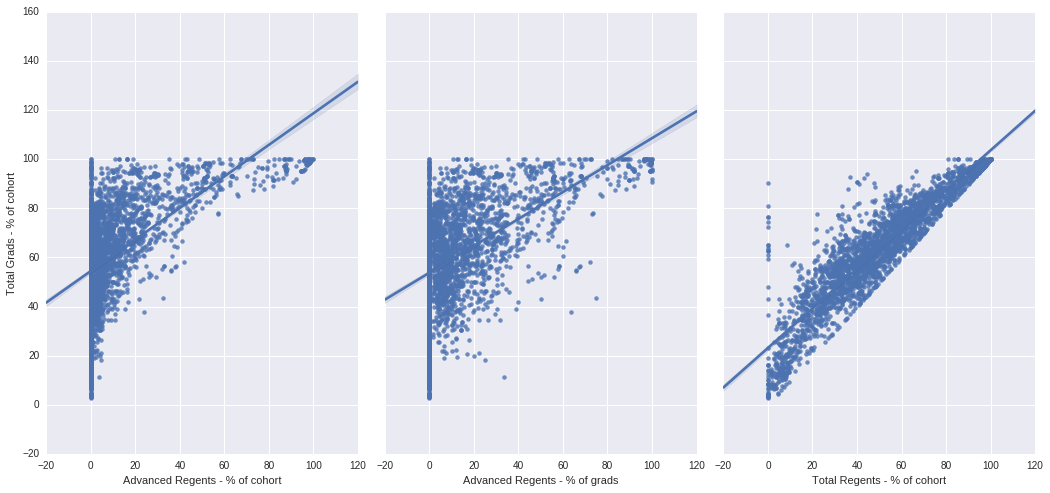

In [45]:
import seaborn as sns
sns.pairplot(sub_outc, x_vars=['Advanced Regents - % of cohort', 'Advanced Regents - % of grads',
       'Total Regents - % of cohort'], y_vars='Total Grads - % of cohort', size=7, aspect=0.7, kind='reg')

In [46]:
data_sample = sub_outc.loc[:, {'Advanced Regents - % of cohort', 'Advanced Regents - % of grads',
       'Total Regents - % of cohort'}]
data_target = sub_outc['Total Grads - % of cohort']

In [47]:
#remove_per('Advanced Regents - % of grads', sub_outc)
sub_outc = sub_outc.dropna()
print(sub_outc.dtypes)
sub_outc.columns.values

Total Regents - % of cohort       float64
Advanced Regents - % of cohort    float64
Advanced Regents - % of grads     float64
DBN                                object
Total Grads - % of cohort         float64
dtype: object


array(['Total Regents - % of cohort', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'DBN', 'Total Grads - % of cohort'], dtype=object)

# Linear regression for graduation percentage

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_sample, data_target, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2125, 3)
(2125,)
(709, 3)
(709,)


In [25]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(linreg.intercept_)
print(linreg.coef_)

23.2023280084
[ 0.16359991  0.83186383 -0.21633224]


In [27]:
linreg.score(x_train, y_train)

0.84081939929234184

In [28]:
linreg.score(x_test, y_test)

0.85774096956095103

In [29]:
linreg_scores = cross_val_score(linreg, data_sample, data_target, cv=10, scoring='mean_squared_error')

In [30]:
mse_linreg_scores = -linreg_scores
print(mse_linreg_scores)

[ 80.52040991  71.71992739  72.79617427  93.83568255  58.04388196
  76.2226779   77.97578534  91.22266393  78.63979758  73.11894601]


In [31]:
rmse_linreg_scores = np.sqrt(mse_linreg_scores)
print(rmse_linreg_scores)

[ 8.97331655  8.46876186  8.53206741  9.68688198  7.61865355  8.73056
  8.83038987  9.55105564  8.8679083   8.5509617 ]


In [32]:
print(rmse_linreg_scores.mean())

8.78105568687


# AP


In [33]:
r_ap = pd.read_csv(DATA_PATH_AP)
print(r_ap.dtypes)
r_ap.head()

DBN                                     object
SchoolName                              object
AP Test Takers                          object
Total Exams Taken                       object
Number of Exams with scores 3 4 or 5    object
dtype: object


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [34]:
r_ap.ix[r_ap['Number of Exams with scores 3 4 or 5'] == 's'] = np.nan
r_ap = r_ap.dropna()                                                                 

In [35]:
len(r_ap)

151

# size of class

In [36]:
r_size = pd.read_csv(DATA_PATH_SIZE)
print(r_size.dtypes)
r_size.head()

CSD                                       int64
BOROUGH                                  object
SCHOOL CODE                              object
SCHOOL NAME                              object
GRADE                                    object
PROGRAM TYPE                             object
CORE SUBJECT (MS CORE and 9-12 ONLY)     object
CORE COURSE (MS CORE and 9-12 ONLY)      object
SERVICE CATEGORY(K-9* ONLY)              object
NUMBER OF STUDENTS / SEATS FILLED       float64
NUMBER OF SECTIONS                      float64
AVERAGE CLASS SIZE                      float64
SIZE OF SMALLEST CLASS                  float64
SIZE OF LARGEST CLASS                   float64
DATA SOURCE                              object
SCHOOLWIDE PUPIL-TEACHER RATIO          float64
dtype: object


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [37]:
def add_DBN_to_class(row):
    dbn = "{0:02d}{1}".format(row["CSD"], row["SCHOOL CODE"])
    return dbn
cl_size = r_size.loc[:, {'CSD','BOROUGH','SCHOOL CODE', 'AVERAGE CLASS SIZE'}]
cl_size["DBN"] = cl_size.apply(add_DBN_to_class, axis=1)
cl_size = cl_size.dropna()
cl_size.tail(10)

,BOROUGH,CSD,AVERAGE CLASS SIZE,SCHOOL CODE,DBN
27600,K,32,23.0,K564,32K564
27601,K,32,12.0,K564,32K564
27602,K,32,26.8,K564,32K564
27603,K,32,28.5,K564,32K564
27604,K,32,24.5,K564,32K564
27605,K,32,23.7,K564,32K564
27606,K,32,25.6,K564,32K564
27607,K,32,32.5,K564,32K564
27608,K,32,26.5,K564,32K564
27609,K,32,25.0,K564,32K564


In [38]:
print(len(sat), "\n", len(math_g),'\n', len(r_ap),'\n',len(cl_size))

478 
 499 
 151 
 26127


# school grade

In [18]:
r_sch_grade = pd.read_csv(DATA_PATH_Sch)
r_sch_grade.dtypes

DBN                                      object
DISTRICT                                  int64
SCHOOL                                   object
PRINCIPAL                                object
PROGRESS REPORT TYPE                     object
SCHOOL LEVEL*                            object
PEER INDEX*                             float64
2010-2011 OVERALL GRADE                  object
2010-2011 OVERALL SCORE                 float64
2010-2011 ENVIRONMENT CATEGORY SCORE    float64
2010-2011 ENVIRONMENT GRADE              object
2010-2011 PERFORMANCE CATEGORY SCORE    float64
2010-2011 PERFORMANCE GRADE              object
2010-2011 PROGRESS CATEGORY SCORE       float64
2010-2011 PROGRESS GRADE                 object
2010-2011 ADDITIONAL CREDIT             float64
2009-10 PROGRESS REPORT GRADE            object
dtype: object

In [19]:
sub_sch_grade = r_sch_grade.loc[:, {'DBN',
                                 'PRINCIPAL',
                                 'PROGRESS REPORT TYPE',
                                 'SCHOOL LEVEL*',
                                 'PEER INDEX*',
                                 '2010-2011 OVERALL GRADE',
                                 '2010-2011 ENVIRONMENT GRADE',
                                 '2010-2011 PERFORMANCE GRADE',
                                 '2010-2011 PROGRESS GRADE',
                                 '2010-2011 ADDITIONAL CREDIT'}]
sub_sch_grade.dropna()
print(len(sub_sch_grade))
sub_sch_grade.head()

1715


,2010-2011 ENVIRONMENT GRADE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,PRINCIPAL,PROGRESS REPORT TYPE,2010-2011 OVERALL GRADE,2010-2011 PERFORMANCE GRADE,DBN,PEER INDEX*,SCHOOL LEVEL*
0,B,C,0.5,Irene Sanchez,EMS,C,D,01M015,63.61,Elementary
1,B,A,0.5,Jacqueline Flanagan,EMS,B,D,01M019,49.48,Elementary
2,B,B,2.0,James Lee,EMS,B,C,01M020,56.65,Elementary
3,B,C,2.5,Joyce Stallings Harte,EMS,C,B,01M034,67.97,K-8
4,B,B,1.5,Darlene Despeignes,EMS,B,B,01M063,58.85,Elementary


In [20]:
sub_sch_grade = sub_sch_grade[sub_sch_grade['SCHOOL LEVEL*'] == 'High School']
len(sub_sch_grade)

426

In [21]:
sub_sch_grade.columns.values

array(['2010-2011 ENVIRONMENT GRADE', '2010-2011 PROGRESS GRADE',
       '2010-2011 ADDITIONAL CREDIT', 'PRINCIPAL', 'PROGRESS REPORT TYPE',
       '2010-2011 OVERALL GRADE', '2010-2011 PERFORMANCE GRADE', 'DBN',
       'PEER INDEX*', 'SCHOOL LEVEL*'], dtype=object)

In [22]:
peer_index = sub_sch_grade.loc[:, {'PEER INDEX*','DBN'}]
peer_index.head()

,DBN,PEER INDEX*
14,01M292,1.81
23,01M448,2.03
25,01M450,2.26
27,01M509,1.78
30,01M539,3.48


In [23]:
len(peer_index)

426

# Merge

In [42]:
#result = left.join(right, lsuffix='_l', rsuffix='_r')
#concat([df1, df4], ignore_index=True)
#comb = pd.concat([sat, math_g], ignore_index=True)

comb = pd.concat([comb, r_ap], ignore_index=True)
comb = pd.concat([comb, cl_size], ignore_index=True)
#comb = comb.dropna()
comb = comb.drop_duplicates('DBN')
print(len(comb))
comb.head()


NameError: name 'comb' is not defined

In [43]:
comb = pd.merge(sat, sub_sch_grade, how = 'inner', on='DBN')
comb = comb.dropna()
comb = comb.drop_duplicates()
comb = pd.merge(comb, sub_demo, how = 'inner', on = 'DBN')
comb = comb.dropna()
comb = comb.drop_duplicates()
comb = pd.merge(comb, cl_size, how = 'inner', on = 'DBN')
comb = comb.dropna()
comb = comb.drop_duplicates()
print(len(comb))
comb.head()

5907


,SAT Writing Avg. Score,SCHOOL NAME,SAT Math Avg. Score,SAT Critical Reading Avg. Score,DBN,Total Avg.,2010-2011 PERFORMANCE GRADE,2010-2011 ENVIRONMENT GRADE,2010-2011 PROGRESS GRADE,SCHOOL LEVEL*,...,schoolyear,asian_per,male_per,female_per,black_per,white_per,BOROUGH,CSD,AVERAGE CLASS SIZE,SCHOOL CODE
0,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,High School,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,17.7,M448
1,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,High School,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,16.6,M448
2,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,High School,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,21.3,M448
3,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,High School,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,20.3,M448
4,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,High School,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,23.7,M448


In [44]:
comb.dtypes

SAT Writing Avg. Score             float64
SCHOOL NAME                         object
SAT Math Avg. Score                float64
SAT Critical Reading Avg. Score    float64
DBN                                 object
Total Avg.                         float64
2010-2011 PERFORMANCE GRADE         object
2010-2011 ENVIRONMENT GRADE         object
2010-2011 PROGRESS GRADE            object
SCHOOL LEVEL*                       object
PEER INDEX*                        float64
2010-2011 ADDITIONAL CREDIT        float64
2010-2011 OVERALL GRADE             object
PROGRESS REPORT TYPE                object
PRINCIPAL                           object
total_enrollment                     int64
schoolyear                           int64
asian_per                          float64
male_per                           float64
female_per                         float64
black_per                          float64
white_per                          float64
BOROUGH                             object
CSD        

In [45]:
comb.columns.values

array(['SAT Writing Avg. Score', 'SCHOOL NAME', 'SAT Math Avg. Score',
       'SAT Critical Reading Avg. Score', 'DBN', 'Total Avg.',
       '2010-2011 PERFORMANCE GRADE', '2010-2011 ENVIRONMENT GRADE',
       '2010-2011 PROGRESS GRADE', 'SCHOOL LEVEL*', 'PEER INDEX*',
       '2010-2011 ADDITIONAL CREDIT', '2010-2011 OVERALL GRADE',
       'PROGRESS REPORT TYPE', 'PRINCIPAL', 'total_enrollment',
       'schoolyear', 'asian_per', 'male_per', 'female_per', 'black_per',
       'white_per', 'BOROUGH', 'CSD', 'AVERAGE CLASS SIZE', 'SCHOOL CODE'], dtype=object)

# try race and sat relationship

In [46]:
comb.reset_index()

,index,SAT Writing Avg. Score,SCHOOL NAME,SAT Math Avg. Score,SAT Critical Reading Avg. Score,DBN,Total Avg.,2010-2011 PERFORMANCE GRADE,2010-2011 ENVIRONMENT GRADE,2010-2011 PROGRESS GRADE,...,schoolyear,asian_per,male_per,female_per,black_per,white_per,BOROUGH,CSD,AVERAGE CLASS SIZE,SCHOOL CODE
0,0,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,17.7,M448
1,1,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,16.6,M448
2,2,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,21.3,M448
3,3,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,20.3,M448
4,4,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,23.7,M448
5,5,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,18.0,M448
6,6,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,25.0,M448
7,8,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,19.0,M448
8,9,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,26.4,M448
9,10,366.0,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,423.0,383.0,01M448,1172.0,C,D,B,...,20102011,22.5,56.4,43.6,26.2,3.7,M,1,27.0,M448


In [47]:
data_used = comb.loc[:, {'asian_per', 'black_per','white_per', 'Total Avg.','male_per','female_per','SAT Math Avg. Score', 
       'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score', 'PEER INDEX*'}]
data_used = data_used.drop_duplicates()
data_used = data_used.dropna()
data_used = data_used.reset_index()
data_sample = data_used.loc[:, {'asian_per', 'black_per', 'white_per','male_per','female_per'}]
data_target = data_used.loc[:, 'SAT Writing Avg. Score']

In [48]:
#data_sample

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_sample, data_target, random_state=1)


In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 5)
(200,)
(67, 5)
(67,)


In [51]:
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:

print(linreg.intercept_)
print(linreg.coef_)


60722.8587475
[ -6.03940768e+02   3.03995222e-01   9.15430448e-01   2.08425491e+00
  -6.03409081e+02]


In [53]:
linreg.score(x_train, y_train)

0.53746038826099674

In [54]:
linreg.score(x_test, y_test)

0.39194391688220587

In [55]:
data_used.columns.values

array(['index', 'asian_per', 'SAT Critical Reading Avg. Score', 'male_per',
       'female_per', 'PEER INDEX*', 'SAT Writing Avg. Score', 'black_per',
       'Total Avg.', 'SAT Math Avg. Score', 'white_per'], dtype=object)

# seaborn

In [56]:
! conda info

Current conda install:

               platform : linux-64
          conda version : 4.2.13
       conda is private : False
      conda-env version : 4.2.13
    conda-build version : 1.21.3
         python version : 3.5.2.final.0
       requests version : 2.10.0
       root environment : /home/xiaohang/anaconda3  (writable)
    default environment : /home/xiaohang/anaconda3
       envs directories : /home/xiaohang/anaconda3/envs
          package cache : /home/xiaohang/anaconda3/pkgs
           channel URLs : https://repo.continuum.io/pkgs/free/linux-64
                          https://repo.continuum.io/pkgs/free/noarch
                          https://repo.continuum.io/pkgs/pro/linux-64
                          https://repo.continuum.io/pkgs/pro/noarch
            config file : None
           offline mode : False



In [57]:
import pip

def install(package):
   pip.main(['install', package])

install('seaborn')

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [58]:
import seaborn as sns

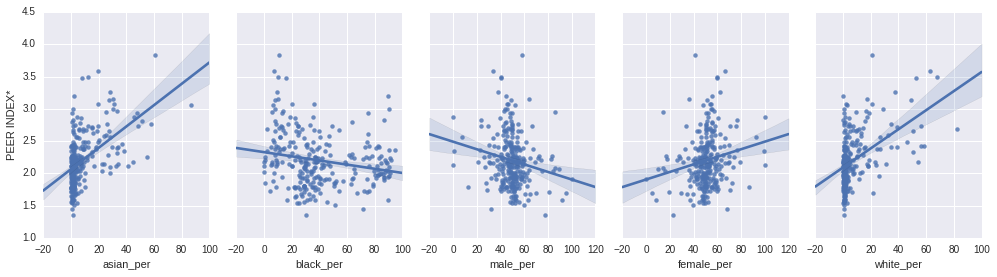

In [61]:

sns.pairplot(data_used, x_vars= ['asian_per', 'black_per', 'male_per', 'female_per','white_per'],
             y_vars='PEER INDEX*', size=4, aspect=0.7, kind='reg')


In [62]:
use_sample = comb.loc[:, {'Level 3+4 %', 'AVERAGE CLASS SIZE', 'Number of Exams with scores 3 4 or 5','Total Avg.'}]           
use_sample = use_sample.loc[use_sample['Total Avg.']!= 0]
len(use_sample)

5907

In [63]:
sample = comb.loc[:, {'Level 3+4 %', 'AVERAGE CLASS SIZE', 'Number of Exams with scores 3 4 or 5'}]
target = comb.loc[:, {'Total Avg.'}]
def turn_o(dataframe, col):
    dataframe[col] = dataframe.ix[dataframe[col] == np.nan] = 0



# try new train data

In [64]:
DATA_PATH_TRAIN = "/home/xiaohang/Desktop/59970/project/data science new topic/train.csv"
DATA_PATH_TAR = "/home/xiaohang/Desktop/59970/project/data science new topic/target.csv"
r_train = pd.read_csv(DATA_PATH_TRAIN)
r_target = pd.read_csv(DATA_PATH_TAR)

In [65]:
print(r_target.shape)
r_train.shape

(368, 4)


(368, 71)

In [66]:
r_target.head()

,DBN,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,M292,355,404,363
1,M448,383,423,366
2,M450,377,402,370
3,M509,390,433,384
4,M539,522,574,525


In [67]:
convert_num(r_target, 'SAT Critical Reading Avg. Score')
convert_num(r_target, 'SAT Math Avg. Score')
convert_num(r_target, 'SAT Writing Avg. Score')
r_target['sum of SAT Avg. Scores'] = r_target.sum(axis=1)
r_target.head()

/home/xiaohang/anaconda3/envs/xiaohang/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,DBN,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sum of SAT Avg. Scores
0,M292,355,404,363,1122
1,M448,383,423,366,1172
2,M450,377,402,370,1149
3,M509,390,433,384,1207
4,M539,522,574,525,1621


In [68]:
final_target = r_target['sum of SAT Avg. Scores']

In [69]:
r_train.columns.values

array(['DBN', 'Num of SAT Test Takers',
       'NUMBER OF STUDENTS / SEATS FILLED.max', 'NUMBER OF SECTIONS.max',
       'AVERAGE CLASS SIZE.max', 'SIZE OF SMALLEST CLASS.max',
       'SIZE OF LARGEST CLASS.max',
       'NUMBER OF STUDENTS / SEATS FILLED.min', 'NUMBER OF SECTIONS.min',
       'AVERAGE CLASS SIZE.min', 'SIZE OF SMALLEST CLASS.min',
       'SIZE OF LARGEST CLASS.min',
       'NUMBER OF STUDENTS / SEATS FILLED.mean', 'NUMBER OF SECTIONS.mean',
       'AVERAGE CLASS SIZE.mean', 'SIZE OF SMALLEST CLASS.mean',
       'SIZE OF LARGEST CLASS.mean', 'SCHOOLWIDE PUPIL-TEACHER RATIO',
       'DISTRICT', 'PEER INDEX*', '2010-2011 OVERALL SCORE',
       '2010-2011 ENVIRONMENT CATEGORY SCORE',
       '2010-2011 PERFORMANCE CATEGORY SCORE',
       '2010-2011 PROGRESS CATEGORY SCORE', '2010-2011 ADDITIONAL CREDIT',
       'COUNT PARTICIPANTS', 'COUNT FEMALE', 'PERCENT FEMALE',
       'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER T

In [70]:
len(r_train)

368

In [71]:
sub_train = r_train.loc[:,{'Num of SAT Test Takers',
       'NUMBER OF STUDENTS / SEATS FILLED.max', 'NUMBER OF SECTIONS.max',
       'AVERAGE CLASS SIZE.max', 'SIZE OF SMALLEST CLASS.max',
       'SIZE OF LARGEST CLASS.max',
       'NUMBER OF STUDENTS / SEATS FILLED.min', 'NUMBER OF SECTIONS.min',
       'AVERAGE CLASS SIZE.min', 'SIZE OF SMALLEST CLASS.min',
       'SIZE OF LARGEST CLASS.min',
       'NUMBER OF STUDENTS / SEATS FILLED.mean', 'NUMBER OF SECTIONS.mean',
       'AVERAGE CLASS SIZE.mean', 'SIZE OF SMALLEST CLASS.mean',
       'SIZE OF LARGEST CLASS.mean', 'SCHOOLWIDE PUPIL-TEACHER RATIO',
       'DISTRICT', 'PEER INDEX*', '2010-2011 OVERALL SCORE',
       '2010-2011 ENVIRONMENT CATEGORY SCORE',
       '2010-2011 PERFORMANCE CATEGORY SCORE',
       '2010-2011 PROGRESS CATEGORY SCORE', '2010-2011 ADDITIONAL CREDIT',
       'COUNT PARTICIPANTS', 'COUNT FEMALE', 'PERCENT FEMALE',
       'COUNT MALE', 'PERCENT MALE', 'COUNT GENDER UNKNOWN',
       'PERCENT GENDER UNKNOWN', 'COUNT GENDER TOTAL',
       'PERCENT GENDER TOTAL', 'COUNT PACIFIC ISLANDER',
       'COUNT HISPANIC LATINO', 'PERCENT HISPANIC LATINO',
       'COUNT AMERICAN INDIAN', 'PERCENT AMERICAN INDIAN',
       'COUNT ASIAN NON HISPANIC', 'PERCENT ASIAN NON HISPANIC',
       'COUNT WHITE NON HISPANIC', 'PERCENT WHITE NON HISPANIC',
       'COUNT BLACK NON HISPANIC', 'PERCENT BLACK NON HISPANIC',
       'COUNT OTHER ETHNICITY', 'PERCENT OTHER ETHNICITY',
       'COUNT ETHNICITY UNKNOWN', 'PERCENT ETHNICITY UNKNOWN',
       'COUNT ETHNICITY TOTAL', 'PERCENT ETHNICITY TOTAL',
       'COUNT PERMANENT RESIDENT ALIEN',
       'PERCENT PERMANENT RESIDENT ALIEN', 'COUNT US CITIZEN',
       'PERCENT US CITIZEN', 'COUNT OTHER CITIZEN STATUS',
       'PERCENT OTHER CITIZEN STATUS', 'COUNT CITIZEN STATUS UNKNOWN',
       'PERCENT CITIZEN STATUS UNKNOWN', 'COUNT CITIZEN STATUS TOTAL',
       'PERCENT CITIZEN STATUS TOTAL', 'COUNT RECEIVES PUBLIC ASSISTANCE',
       'PERCENT RECEIVES PUBLIC ASSISTANCE',
       'COUNT NRECEIVES PUBLIC ASSISTANCE',
       'PERCENT NRECEIVES PUBLIC ASSISTANCE',
       'COUNT PUBLIC ASSISTANCE UNKNOWN',
       'PERCENT PUBLIC ASSISTANCE UNKNOWN',
       'COUNT PUBLIC ASSISTANCE TOTAL', 'PERCENT PUBLIC ASSISTANCE TOTAL',
       'YTD % Attendance (Avg)', 'YTD Enrollment(Avg)'}]
sub_train.dropna(axis = 0)
len(sub_train)

368

In [146]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sub_train, final_target, random_state=1)


In [147]:
linreg = LinearRegression()

linreg.fit(x_train, y_train)#still have some Nan varibles

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
r_mas1 = pd.read_excel(DATA_PATH_MAS1)
print(r_mas1.dtypes)
r_mas1.head()

2011 School Survey for District 75 Schools\nPlease refer to the Data Dictionary file for more detailed information about the format of this data    object
Unnamed: 1                                                                                                                                          object
Unnamed: 2                                                                                                                                          object
Unnamed: 3                                                                                                                                          object
Unnamed: 4                                                                                                                                          object
Unnamed: 5                                                                                                                                          object
Unnamed: 6                                                            

,2011 School Survey for District 75 Schools Please refer to the Data Dictionary file for more detailed information about the format of this data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1758,Unnamed: 1759,Unnamed: 1760,Unnamed: 1761,Unnamed: 1762,Unnamed: 1763,Unnamed: 1764,Unnamed: 1765,Unnamed: 1766,Unnamed: 1767
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dbn,schoolname,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
2,75K004,P.S. K004,38,90,72,8,81,244,21,90,...,29,0,0,0,0,0,0,0,0,0
3,75K036,P.S. 36,70,69,44,97,43,115,139,62,...,20,27,19,9,2,6,1,2,0,0
4,75K053,P.S. K053,94,97,53,131,75,189,139,77,...,14,12,12,10,21,13,11,2,0,0


In [28]:
r_mas2 = pd.read_excel(DATA_PATH_MAS2)
print(r_mas2.dtypes)
r_mas2.head()

2011 School Survey for Community Schools\nPlease refer to the Data Dictionary file for more detailed information about the format of this data.    object
Unnamed: 1                                                                                                                                         object
Unnamed: 2                                                                                                                                         object
Unnamed: 3                                                                                                                                         object
Unnamed: 4                                                                                                                                         object
Unnamed: 5                                                                                                                                         object
Unnamed: 6                                                                  

,2011 School Survey for Community Schools Please refer to the Data Dictionary file for more detailed information about the format of this data.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 1927,Unnamed: 1928,Unnamed: 1929,Unnamed: 1930,Unnamed: 1931,Unnamed: 1932,Unnamed: 1933,Unnamed: 1934,Unnamed: 1935,Unnamed: 1936
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dbn,schoolname,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
2,01M015,P.S. 015 Roberto Clemente,NaN,88,60,NaN,22,90,0,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M019,P.S. 019 Asher Levy,NaN,100,60,NaN,34,161,0,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M020,P.S. 020 Anna Silver,NaN,88,73,NaN,42,367,0,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
r_sur = pd.read_excel(DATA_PATH_SUR)
print(r_sur.dtypes)
r_sur.head()

2011 NYC School Survey\nData Dictionary    object
Unnamed: 1                                 object
dtype: object


,2011 NYC School Survey Data Dictionary,Unnamed: 1
0,This data dictionary can be used with the scho...,NaN
1,NaN,NaN
2,Field Name,Field Description
3,dbn,School identification code (district borough n...
4,sch_type,"School type (Elementary, Middle, High, etc)"
